In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../output/results_meta_transfer.csv')
df.head()

,seed,num_support,patients,finetune_patients,excluded_patients,auc,skip_base_learner,skip_finetune
0,1,20,[7],[7],"[7, 9, 1, 0, 17]",0.281592,False,False
1,1,20,"[7, 9, 1]","[7, 9, 1]","[7, 9, 1, 0, 17]",0.848946,False,False
2,1,20,"[7, 9, 1, 0, 17]","[7, 9, 1, 0, 17]","[7, 9, 1, 0, 17]",0.870846,False,False
3,1,1,"[7, 9]",[7],"[7, 9, 1, 0, 17]",0.371398,False,False
4,1,1,"[7, 1]",[7],"[7, 9, 1, 0, 17]",0.724593,False,False


In [3]:
import ast
df['num_patients'] = df['patients'].apply(lambda x: len(ast.literal_eval(x)))
df.groupby(['num_patients', 'num_support'])['auc'].mean()

num_patients  num_support
1             1              0.609361
              3              0.660319
              5              0.677069
              10             0.715179
              15             0.705845
              20             0.697258
2             1              0.696291
              3              0.712115
              5              0.727901
              10             0.737764
              15             0.740597
              20             0.744282
3             1              0.657623
              3              0.708055
              5              0.732511
              10             0.744666
              15             0.747021
              20             0.756470
4             1              0.672461
              3              0.702548
              5              0.728123
              10             0.737456
              15             0.741868
              20             0.743498
5             1              0.652397
              3         

In [4]:
df['total_shots_per_class'] = df['num_patients'] * df['num_support']
df.head()

,seed,num_support,patients,finetune_patients,excluded_patients,auc,skip_base_learner,skip_finetune,num_patients,total_shots_per_class
0,1,20,[7],[7],"[7, 9, 1, 0, 17]",0.281592,False,False,1,20
1,1,20,"[7, 9, 1]","[7, 9, 1]","[7, 9, 1, 0, 17]",0.848946,False,False,3,60
2,1,20,"[7, 9, 1, 0, 17]","[7, 9, 1, 0, 17]","[7, 9, 1, 0, 17]",0.870846,False,False,5,100
3,1,1,"[7, 9]",[7],"[7, 9, 1, 0, 17]",0.371398,False,False,2,2
4,1,1,"[7, 1]",[7],"[7, 9, 1, 0, 17]",0.724593,False,False,2,2


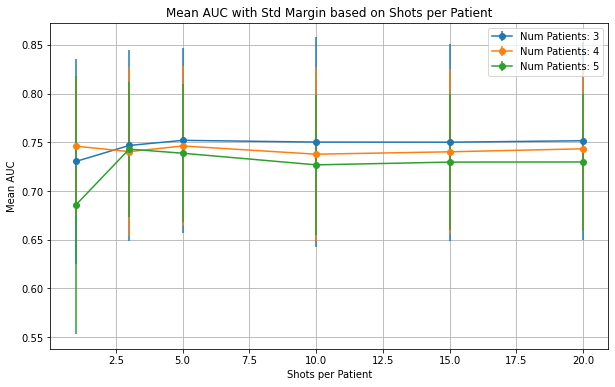

In [5]:

# Group the DataFrame by 'num_patients' and 'total_shots_per_class', and calculate mean and std
grouped = df.groupby(['num_patients', 'num_support'])['auc'].agg(['mean', 'std']).reset_index()
grouped = grouped[grouped['num_patients'] != 2]
# Create a plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Iterate through unique 'num_patients' values and plot mean with std margin for each
for num_patients, group in grouped.groupby('num_patients'):
    # plt.plot(group['num_support'], group['mean'], label=f'Num Patients: {num_patients}')
    # plt.fill_between(group['total_shots_per_class'], group['mean'] - group['std'], group['mean'] + group['std'], alpha=0.2)
    plt.errorbar(group['num_support'], group['mean'], yerr=group['std'], label=f'Num Patients: {num_patients}', fmt='-o')
# Add labels and title
plt.xlabel('Shots per Patient')
plt.ylabel('Mean AUC')
plt.title('Mean AUC with Std Margin based on Shots per Patient')
plt.legend()

# Show the plot
plt.grid(True)

In [6]:
df['excluded_patients'].unique()

array(['[0, 3, 7, 10, 6]', '[7, 9, 0, 12, 1]', '[9, 12, 6, 17, 0]',
       '[10, 3, 6, 0, 5]', '[5, 0, 7, 1, 17]', '[12, 9, 0, 10, 7]',
       '[10, 17, 5, 0, 1]', '[17, 0, 7, 1, 3]', '[10, 12, 6, 9, 7]',
       '[7, 1, 12, 5, 0]', '[7, 9, 10, 5, 1]', '[9, 1, 3, 12, 0]'],
      dtype=object)

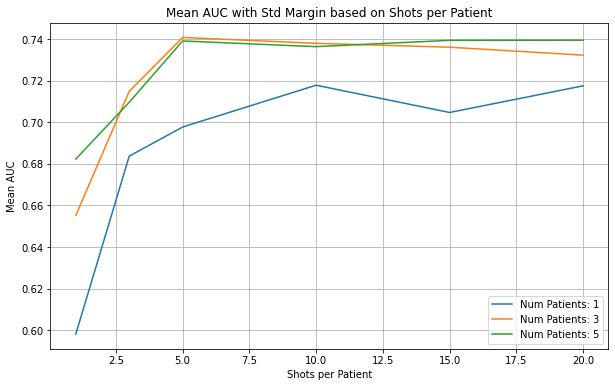

In [7]:
df_ft = pd.read_csv('../output/results_with_validation.csv')
df_ft['num_patients'] = df_ft['patients'].apply(lambda x: len(ast.literal_eval(x)))
df_ft.groupby(['num_patients', 'num_support'])['auc'].mean()
df_ft['total_shots_per_class'] = df_ft['num_patients'] * df_ft['num_support']

# Group the DataFrame by 'num_patients' and 'total_shots_per_class', and calculate mean and std
grouped_ft = df_ft.groupby(['num_patients', 'num_support'])['auc'].agg(['mean', 'std']).reset_index()
# grouped_ft = grouped_ft[grouped_ft['num_patients'] == 3]
# Create a plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Iterate through unique 'num_patients' values and plot mean with std margin for each
for num_patients, group in grouped_ft.groupby('num_patients'):
    plt.plot(group['num_support'], group['mean'], label=f'Num Patients: {num_patients}')
    # plt.fill_between(group['total_shots_per_class'], group['mean'] - group['std'], group['mean'] + group['std'], alpha=0.2)
    # plt.errorbar(group['num_support'], group['mean'], yerr=group['std'], label=f'Num Patients: {num_patients}', fmt='-o')
# Add labels and title
plt.xlabel('Shots per Patient')
plt.ylabel('Mean AUC')
plt.title('Mean AUC with Std Margin based on Shots per Patient')
plt.legend()

# Show the plot
plt.grid(True)

In [8]:
df_ft

,seed,num_support,patients,finetune_patients,excluded_patients,auc,num_patients,total_shots_per_class
0,1,1,[3],[3],"[3, 1, 7, 0, 9]",0.758027,1,1
1,1,1,"[3, 1, 7]",[3],"[3, 1, 7, 0, 9]",0.439854,3,3
2,1,1,"[3, 1, 7, 0, 9]",[3],"[3, 1, 7, 0, 9]",0.636504,5,5
3,1,3,[3],[3],"[3, 1, 7, 0, 9]",0.758435,1,3
4,1,3,"[3, 1, 7]",[3],"[3, 1, 7, 0, 9]",0.599720,3,9
...,...,...,...,...,...,...,...,...
643,99,15,"[1, 5, 17]",[1],"[1, 5, 17, 0, 6]",0.662006,3,45
644,99,15,"[1, 5, 17, 0, 6]",[1],"[1, 5, 17, 0, 6]",0.760967,5,75
645,99,20,[1],[1],"[1, 5, 17, 0, 6]",0.780343,1,20
646,99,20,"[1, 5, 17]",[1],"[1, 5, 17, 0, 6]",0.686286,3,60


In [9]:
grouped['case'] = 'Not finetuned'
grouped_ft['case'] = 'Finetuned'
merged = pd.concat([grouped, grouped_ft], ignore_index=True)
merged.head()

,num_patients,num_support,mean,std,case
0,1,1,0.629258,0.263934,Not finetuned
1,1,2,0.638494,0.261945,Not finetuned
2,1,3,0.713284,0.208768,Not finetuned
3,1,4,0.657085,0.239725,Not finetuned
4,1,6,0.727755,0.182223,Not finetuned


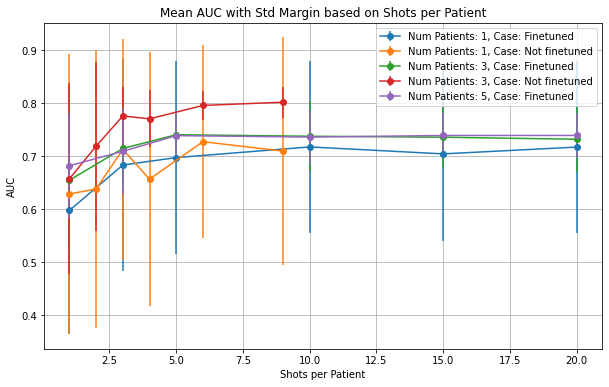

In [10]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Iterate through unique 'num_patients' values and plot mean with std margin for each
for num_patients, group in merged.groupby(['num_patients', 'case']):
    # plt.plot(merged['num_support'], merged['mean'], label=f'Num Patients: {num_patients}')
    # plt.fill_between(group['total_shots_per_class'], group['mean'] - group['std'], group['mean'] + group['std'], alpha=0.2)
    plt.errorbar(group['num_support'], group['mean'], yerr=group['std'], label=f'Num Patients: {num_patients[0]}, Case: {num_patients[1]}', fmt='-o')
# Add labels and title
plt.xlabel('Shots per Patient')
plt.ylabel('AUC')
plt.title('Mean AUC with Std Margin based on Shots per Patient')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('./meta_transfer_learning.png')

# Paper Results

In [4]:
df = pd.read_csv('../output/results_meta_transfer.csv')
df['num_patients'] = df['patients'].apply(lambda x: len(ast.literal_eval(x)))
df['patients'] = df['patients'].apply(lambda x: ast.literal_eval(x))
df['finetune_patients'] = df['finetune_patients'].apply(lambda x: ast.literal_eval(x))
df.sample(n=5)


,seed,num_support,patients,finetune_patients,excluded_patients,auc,skip_base_learner,skip_finetune,num_patients
4463,99,20,"[17, 1, 10]",[17],"[17, 0, 1, 12, 10]",0.827834,False,False,3
673,1,10,"[1, 17, 10]","[1, 17, 9]","[1, 17, 9, 5, 10]",0.692646,False,True,3
2686,99,5,"[6, 3, 9, 7]",[6],"[6, 3, 10, 9, 7]",0.770870,False,False,4
1837,1,20,"[1, 7, 5, 17]",[1],"[1, 7, 5, 17, 9]",0.772667,False,False,4
150,1,15,"[9, 1, 17]","[7, 9, 1]","[7, 9, 1, 0, 17]",0.560556,False,True,3


## Compare per number of patients

mean  num_patients
1    0.703452
3    0.867768
5    0.876588
Name: auc, dtype: float64
std  num_patients
1    0.229400
3    0.029879
5    0.026641
Name: auc, dtype: float64


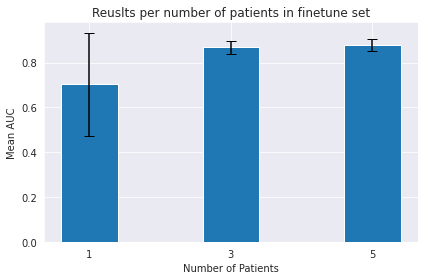

In [5]:
condition = (df['patients'].apply(lambda x: x) == df['finetune_patients']) & (~df['skip_finetune']) & (~df['skip_base_learner'])
df_patient_based = df[condition]
grouped_data = df_patient_based.groupby('num_patients')['auc']

mean_auc = grouped_data.mean()
std_auc = grouped_data.std()
print("mean ", mean_auc)
print("std ", std_auc)
num_patients = mean_auc.index

# Creating the bar plot with error bars
plt.bar(num_patients, mean_auc, yerr=std_auc, capsize=5, align='center')
plt.xlabel('Number of Patients')
plt.ylabel('Mean AUC')
plt.title('Reuslts per number of patients in finetune set')
plt.xticks(num_patients)

plt.tight_layout()
plt.savefig('./per_patient.png')

In [6]:
df['patients'].apply(lambda x: x)

0                    [7]
1              [7, 9, 1]
2       [7, 9, 1, 0, 17]
3                 [7, 9]
4                 [7, 1]
              ...       
5611          [12, 7, 1]
5612           [0, 7, 1]
5613                 [6]
5614          [6, 12, 0]
5615    [6, 12, 0, 7, 1]
Name: patients, Length: 5616, dtype: object

## Updating with new shots

0     1
1     3
2     5
3    10
4    15
5    20
Name: num_support, dtype: int64 0    0.696291
1    0.712115
2    0.727901
3    0.737764
4    0.740597
5    0.744282
Name: mean, dtype: float64
6      1
7      3
8      5
9     10
10    15
11    20
Name: num_support, dtype: int64 6     0.677167
7     0.710297
8     0.739375
9     0.750802
10    0.753363
11    0.755525
Name: mean, dtype: float64
12     1
13     3
14     5
15    10
16    15
17    20
Name: num_support, dtype: int64 12    0.672461
13    0.702548
14    0.728123
15    0.737456
16    0.741868
17    0.743498
Name: mean, dtype: float64
18     1
19     3
20     5
21    10
22    15
23    20
Name: num_support, dtype: int64 18    0.652397
19    0.702603
20    0.724673
21    0.723332
22    0.727115
23    0.729298
Name: mean, dtype: float64


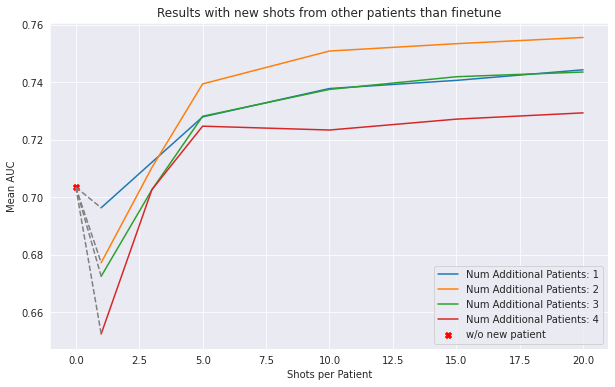

In [7]:
condition = (df['patients'].apply(lambda x: x) != df['finetune_patients']) & (~df['skip_finetune']) & (~df['skip_base_learner'])
df_updating_shots = df[condition]
grouped = df_updating_shots.groupby(['num_patients', 'num_support'])['auc'].agg(['mean', 'std']).reset_index()
# Create a plot
plt.figure(figsize=(10, 6))

# Iterate through unique 'num_patients' values and plot mean with std margin for each
for num_patients, group in grouped.groupby('num_patients'):
    print(group['num_support'], group['mean'])
    plt.plot(group['num_support'], group['mean'], label=f'Num Additional Patients: {num_patients -1}')
    # plt.fill_between(group['to epoch > best_epoch + PATIENCE_STOPPING:
        #     btal_shots_per_class'], group['mean'] - group['std'], group['mean'] + group['std'], alpha=0.2)
    # plt.errorbar(group['num_support'], group['median'], yerr=group['std'], label=f'Num Patients: {num_patients}', fmt='-o')
# Add labels and title
# Add a single point to the plot
additional_point_x = 0
additional_point_y = grouped_data.mean().loc[1]
plt.scatter(additional_point_x, additional_point_y, color='red', marker='X', label='w/o new patient')

# Connect the additional point to all the plots
for num_patients, group in grouped.groupby('num_patients'):
    plt.plot([additional_point_x, group['num_support'].iloc[0]], [additional_point_y, group['mean'].iloc[0]], color='gray', linestyle='dashed')

plt.xlabel('Shots per Patient')
plt.ylabel('Mean AUC')
plt.title('Results with new shots from other patients than finetune')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('./new_shot.png')

In [8]:
grouped_data.mean().loc[2]

KeyError: 2

## Ablation study

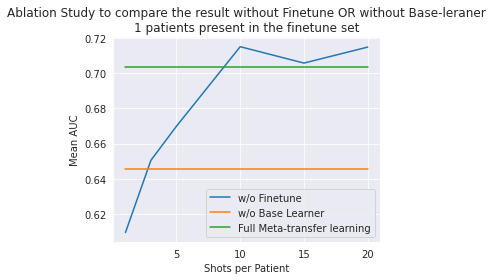

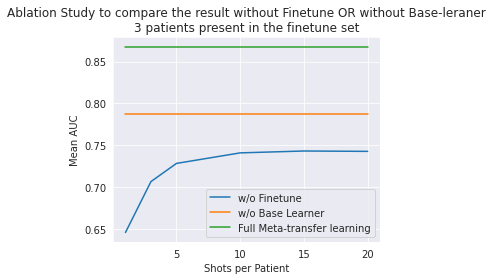

In [9]:
# plt.figure()
df_skip_finetune = df[df['skip_finetune']]
df_skip_base_learner = df[df['skip_base_learner']]
for num_patient_in_FT in [1,3]:
    plt.figure()
    df_skip_finetune[df_skip_finetune['num_patients'] == num_patient_in_FT].groupby('num_support')['auc'].mean().plot(label='w/o Finetune')
    skip_BL_value = df_skip_base_learner[df_skip_base_learner['num_patients'] == num_patient_in_FT].groupby('num_support')['auc'].mean().to_list()
    plt.plot([1, 3, 5, 10, 15, 20], skip_BL_value * 6, label='w/o Base Learner')
    plt.plot([1, 3, 5, 10, 15, 20],[grouped_data.mean().loc[num_patient_in_FT]] * 6, label='Full Meta-transfer learning')

    plt.xlabel('Shots per Patient')
    plt.ylabel('Mean AUC')
    plt.title('Ablation Study to compare the result without Finetune OR without Base-leraner\n{} patients present in the finetune set'.format(num_patient_in_FT))
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('./Ablation_study_{}.png'.format(num_patient_in_FT))

In [10]:
df_skip_finetune[df_skip_finetune['num_patients'] == num_patient_in_FT].groupby('num_support')['auc'].std()

num_support
1     0.161101
3     0.110510
5     0.084207
10    0.072119
15    0.067456
20    0.068028
Name: auc, dtype: float64

In [35]:
import scipy.stats as stats
data2 = df_skip_base_learner[df_skip_base_learner['num_patients'] == 3]['auc'].to_list()
data1 = df_patient_based[df_patient_based['num_patients'] == 3]['auc'].to_list()
t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=True)  # Assuming unequal variances\
t_stat, p_value

(-8.177728157624244, 3.0866341901147937e-11)

In [40]:
data3 = df_skip_finetune[(df_skip_finetune['num_patients'] == 3) & (df_skip_finetune['num_support'] == 20)]['auc'].to_list()
t_stat, p_value = stats.ttest_ind(data1, data3, equal_var=True)  # Assuming unequal variances\
t_stat, p_value

(3.54115179318214, 0.00045604960856624024)

# AF results

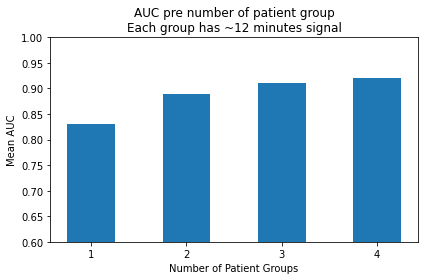

In [36]:

# Creating the bar plot with error bars
plt.bar([1, 2, 3, 4], [0.83, 0.89, 0.91, 0.92], align='center', width=0.5)
plt.xlabel('Number of Patient Groups')
plt.ylabel('Mean AUC')
plt.ylim([0.6, 1.0])
plt.title('AUC pre number of patient group\nEach group has ~12 minutes signal')
plt.xticks([1, 2, 3, 4])

plt.tight_layout()
plt.savefig('./AF_per_patient.png')

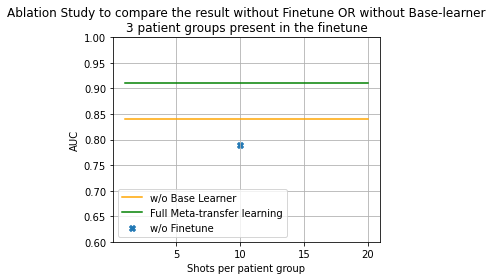

In [35]:
plt.plot([1, 3, 5, 10, 15, 20], [0.84] * 6, label='w/o Base Learner', color='orange')
plt.plot([1, 3, 5, 10, 15, 20],[0.91] * 6, label='Full Meta-transfer learning', color='g')
plt.scatter([10],[0.79], label='w/o Finetune', marker = 'X')
plt.ylim([0.6, 1.0])
plt.xlabel('Shots per patient group')
plt.ylabel('AUC')
plt.title('Ablation Study to compare the result without Finetune OR without Base-learner\n3 patient groups present in the finetune')
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig('./AF_ablation.png')